## Group 09

Name:
1. Subarna Chaki
2. Sanket Bangar
3. Survi Kumari
4. Asit Dave

# P03: Point Processes

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import math
import seaborn as sns

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.

(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [2]:
# Given parameters
reps = 10          # number of repetations
num_samples = 10   # samples in each repetations
mu, sigma = 0, 1

samples = []

for i in range(reps):
    sample = np.random.normal(mu, sigma, num_samples)
    samples.append(sample)

sample_means = [np.mean(m) for m in samples]

unbiased_var = [np.var(m, ddof = 0) for m in samples] # Unbiased estimator

biased_var = [np.var(m, ddof = 1) for m in samples] # Biased estimator

In [3]:
df = pd.DataFrame({
    "Sample": np.arange(1, 11),  # For 10 simulations
    "Mean": sample_means,
    "Variance (Unbiased)": unbiased_var,
    "Variance (Biased)": biased_var
})

df.set_index('Sample')

,Mean,Variance (Unbiased),Variance (Biased)
Sample,,,
1,-0.048858,0.337163,0.374625
2,-0.125063,0.647192,0.719102
3,-0.133399,0.480852,0.534280
4,-0.224025,2.358884,2.620983
5,0.272428,2.276804,2.529782
6,0.153334,1.189388,1.321542
7,0.355571,1.579364,1.754849
8,-0.060769,0.494691,0.549657
9,-0.188086,1.265733,1.406371


## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.


In [4]:
def dist_indices(num_samples, reps = 100, biased = True):

    """
    Computes sample means and variances from a normal distribution.

    Args:
        num_samples (int): The number of samples to generate in each repetition/simulation.
        reps (int, optional): The number of repetitions/simulation. Defaults to 100.
        biased (bool, optional): Whether to use the biased or unbiased estimator for variance. Defaults to True.

    Returns:
        tuple[list, list]: A tuple containing two lists: sample means and sample variances.
    """

    # Given parameters
    mu, sigma = 0, 1

    sample_means = []
    sample_vars = []

    for i in range(reps):
        sample = np.random.normal(mu, sigma, num_samples)
        sample_means.append(np.mean(sample))

        if biased:
            sample_vars.append(np.var(sample, ddof = 1)) # Biased variance

        else:
            sample_vars.append(np.var(sample, ddof = 0)) # Unbiased variance

    return sample_means, sample_vars


(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

Updated by tutors

In [6]:
import scipy.stats as stats

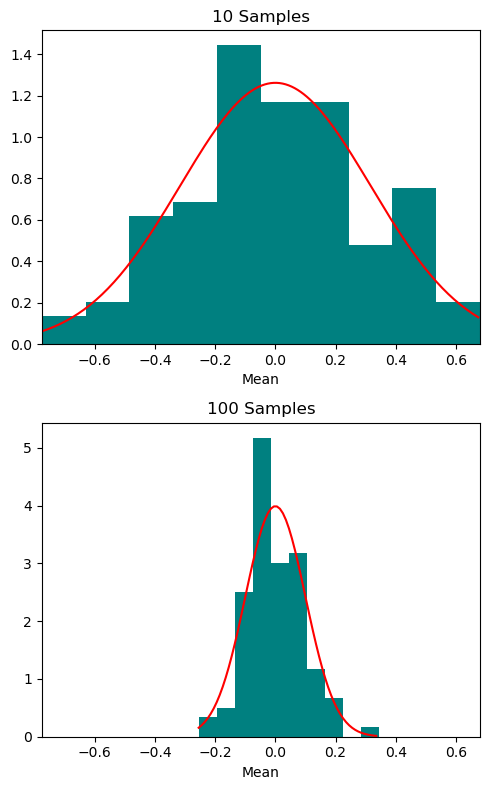

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5, 8))

sample10 = dist_indices(10)[0] # Mean for 10 samples and 100 simulations/repetations
sample100 = dist_indices(100)[0] # Mean for 100 samples and 100 simulations/repetations

counts, bin_edges,image = ax1.hist(sample10, color = 'teal', density = True)
ax1.set_title('10 Samples')
ax1.set_xlabel('Mean')
ax1.set_xlim(np.min(sample10), np.max(sample10))

bin_centers = np.arange(np.min(sample10), np.max(sample10), 0.01)
expectation = stats.norm.pdf(bin_centers, 0, 1/np.sqrt(10))

ax1.plot(bin_centers, expectation, color ='r')


ax2.hist(sample100, color = 'teal', density = True)
ax2.set_title('100 Samples')
ax2.set_xlabel('Mean')
ax2.set_xlim(np.min(sample10), np.max(sample10))

bin_centers = np.arange(np.min(sample100), np.max(sample100), 0.01)
expectation = stats.norm.pdf(bin_centers, 0, 1/np.sqrt(100))

ax2.plot(bin_centers, expectation, color ='r')


plt.tight_layout()
plt.show()

Observations:
- We see that the histogram peaks at zero, as expected. This behaviour is more prominent when we have large sample sizes.
- In case of 10 samples, the histogram (or sample mean) is spread across a large range. Thus, we can say that the mean distribution deviates with larger sigma from the true mean.
- Increasing the number of samples, the range of spread of histogram decreses to a great extent. In other words, we get peaked behaviour for larger sample sizes, which exemplifies the fact that the sample mean approaches true mean as the size of sample increases.

Comments from tutors:

We expect that the error on the mean scales as 1/$\sqrt n$. This is the reason why we see a narrower distribution of the means as we increase the sample size. The red gaussians represent the gaussian expectations for the distribution of the means for the sample sizes of 10 and 100.

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations. How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

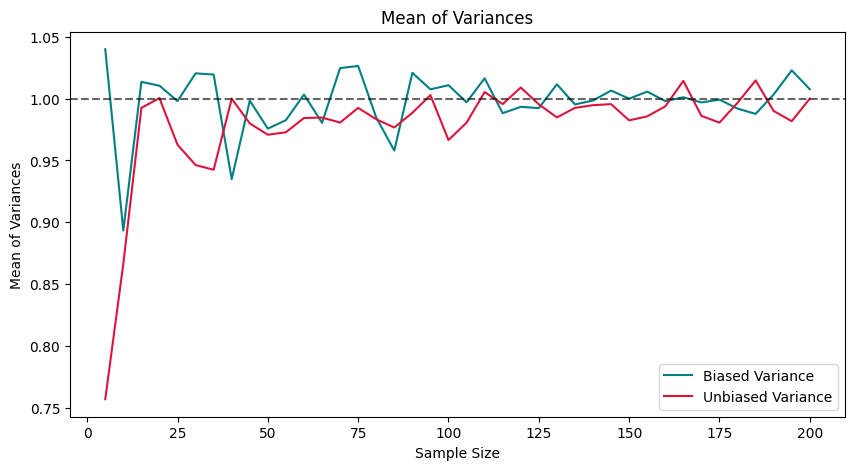

In [19]:
# Defining the sample size range
sample_size = np.arange(5, 205, 5)

# Initializing empty lists to store the means of biased and unbiased variances
var_b_means = []
var_ub_means = []

# Iterating over the sample sizes
for size in sample_size:
    # Generating 100 samples of different sample sizes from the normal distribution with biased and unbiased variance estimators
    var_b_means.append(np.mean(dist_indices(size, biased = True)[1]))
    var_ub_means.append(np.mean(dist_indices(size, biased = False)[1]))

plt.figure(figsize = (10, 5))
plt.plot(sample_size, var_b_means, color = 'teal', label = 'Biased Variance')
plt.plot(sample_size, var_ub_means, color = 'crimson', label = 'Unbiased Variance')
plt.axhline(y = 1, color = 'black', alpha = 0.6, linestyle = '--')

plt.title('Mean of Variances')
plt.xlabel('Sample Size')
plt.ylabel('Mean of Variances')
plt.legend()
plt.show()

We see that the Biased variance approaches true variance ($\sigma = 1$) as the sample size increases. Moreover, in contrast to the unbiased variance, which nearly approximates the true variance, biased variance underestimates the true variance for smaller sample sizes.

## Problem 3: Analyzing samples

Load `sample1.out` from the `data` directory into your notebook. Inspect the distribution of the sample by plotting a histogram. 

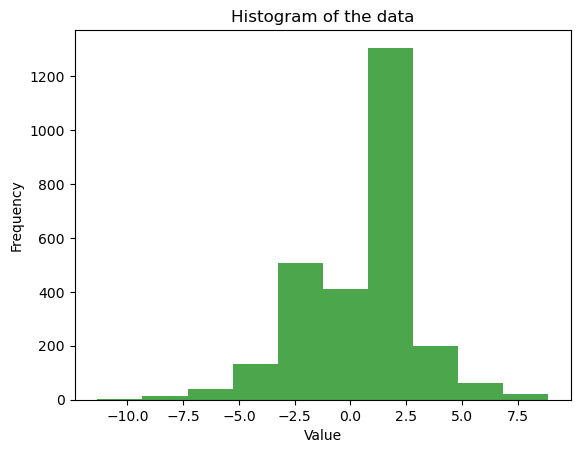

In [27]:
# load the data for the first sample
data1= np.loadtxt("data/sample1.out")

# plot a histogram of the data
plt.hist(data1,color="green",alpha=0.7)
plt.title("Histogram of the data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

In [28]:

class MeanVarianceEstimator:
    """
    A class for estimating mean, variance, error on mean, and bias of variance.

    Parameters:
    - samples (array-like): The sample data for estimation.
    - variance_estimator (str): Choice of variance estimator: 'biased' or 'unbiased'.
    """

    def __init__(self, samples, variance_estimator):
        """
        Initialize the MeanVarianceEstimator.
        """
        
        self.samples = samples
        self.variance_estimator = variance_estimator

    def estimate_mean(self):
        """
        Estimate the mean of the sample data.

        Returns:
        - float: Estimated mean.
        """
        return np.mean(self.samples)

    def estimate_variance(self):
        """
        Estimate the variance of the sample data.

        Returns:
        - float: Estimated variance.
        """
        if self.variance_estimator == "biased":
            return np.var(self.samples, ddof=0)
        elif self.variance_estimator == "unbiased":
            return np.var(self.samples, ddof=1)
        else:
            raise ValueError("Invalid variance estimator choice. Use 'biased' or 'unbiased'.")

    def estimate_error_on_mean(self):
        """
        Estimate the error on the mean.

        Returns:
        - float: Estimated error on the mean.
        """
        n = len(self.samples)
        variance = self.estimate_variance()
        return np.sqrt(variance / n)

    def estimate_bias_of_variance(self, true_variance):
        """
        Estimate the bias of the variance estimator.

        Parameters:
        - true_variance (float): The true population variance for bias calculation.

        Returns:
        - float: Estimated bias of the variance estimator.
        """
        estimated_variance = self.estimate_variance()
        return estimated_variance - true_variance


(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.


In [29]:
true_population_variance = 6  # Assume we know the true population variance to be equal to 6

estimator = MeanVarianceEstimator(data1, variance_estimator="biased")   # Create an instance of the MeanVarianceEstimator class
mean = estimator.estimate_mean()
variance = estimator.estimate_variance()
median=np.median(data1)

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Median: {median}")

Mean: 0.6061677979776571
Variance: 6.48232299513079
Median: 1.857948895866691


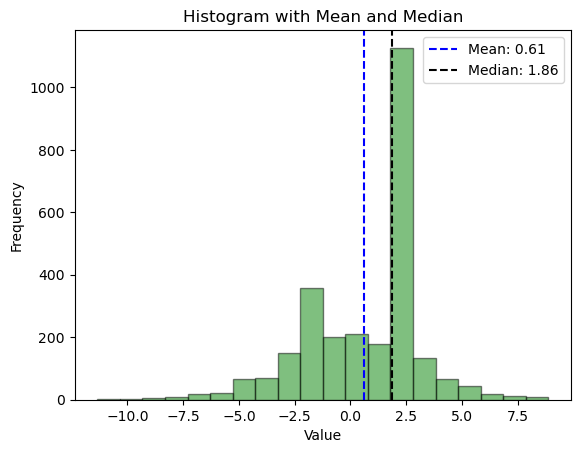

In [30]:
plt.hist(data1, bins=20, edgecolor='black', color='green', alpha=0.5)
plt.title('Histogram with Mean and Median')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.axvline(mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='black', linestyle='dashed', linewidth=1.5, label=f'Median: {median:.2f}')

plt.legend()

plt.show()

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

In [31]:
#Estimating the mean and variance of all the remaining samples in the data directory.

data=[]
data_mean=[]
data_variance=[]
path="data/sample"

for k in range(10):
    data_file= np.loadtxt(path + str(k+1) +".out") 
    data.append(data_file)

    estimator = MeanVarianceEstimator(data_file, variance_estimator="biased") #can change to unbiased as well
    sample_mean = estimator.estimate_mean()
    sample_variance = estimator.estimate_variance()
    data_mean.append(sample_mean)
    data_variance.append(sample_variance)
    


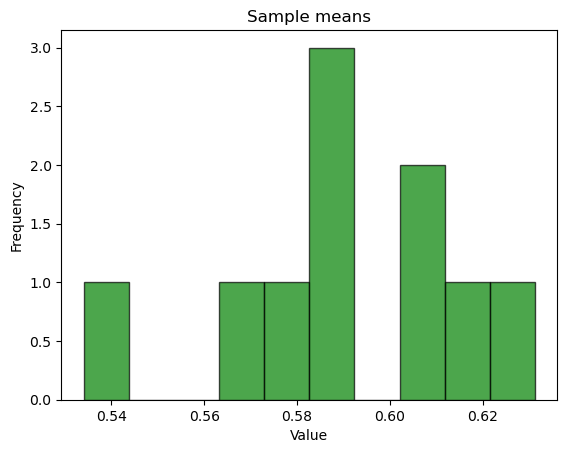

In [32]:
plt.hist(data_mean, edgecolor='black',color="green", alpha = 0.7)
plt.title('Sample means')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Yes, the samples do seem to be drawn from the same underlying distribution. This becomes evident once the histogram of the sample means is plotted, as :

1. There's clearly a value among the set of sample means that has the highest frequency (Around 0.58).
2. The range of means (~0.8) here is rather compact, and not very scattered( or random).

### Additions from tutors

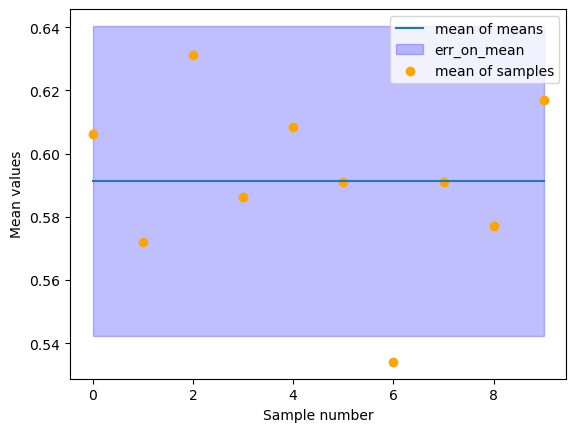

In [65]:
mean_of_mean = np.mean(data_mean)
std_of_mean = np.std(data_mean, ddof =1)

data1= np.loadtxt("data/sample1.out")
error_on_mean = np.std(data1, ddof = 1)/np.sqrt(len(data1))

plt.figure()
samp = np.arange(0,10)
plt.plot(samp, [mean_of_mean]*len(samp), label ='mean of means')

# plt.fill_between(samp, y1 = (mean_of_mean - std_of_mean), y2 = (mean_of_mean + std_of_mean), alpha = 0.25, color = 'b')
plt.fill_between(samp, y1 = (mean_of_mean - error_on_mean), y2 = (mean_of_mean + error_on_mean), alpha = 0.25, color = 'b', label = 'err_on_mean')

plt.scatter(samp, data_mean, c = 'orange', label = 'mean of samples')
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Mean values')
plt.show()

#### Comments from tutors

The spread on the mean = np.std(data_mean)

The error on mean calculated from the sample directly = np.std(sample)/np.sqrt(n)

If the samples are drawn from the same distribution, we expect the means to be distributed within 1 sigma (error on the mean) limit calculated from the sample, which is what we see for 9 out of 10 points. Thus, we can conclude that the samples are likely drawn from the same distribution.

## Problem 4: The Poisson distribution

Let us assume we have a process in which the probability of a given event, $p$, is small but we perform a large number of trials $N$. We further assume that the so-called rate of this process (or mean number of ocurring events), $\lambda=Np$, is finite and constant. Then the probability of $k$ events occurring follows a Poisson distribution given by $$P(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}.$$ So the Poisson distribution describes the distributions of events, where each single one is rare but we perform a large number of trials in order to keep $\lambda$ constant. An example for this is the number of photons reaching a telescope.

One of the earliest application of Poisson processes was the probability of Prussian soldiers being kicked to death by horses. This problem was analyzed by Ladislaus Bortkiewicz in 1898. Analyzing 10 Prussian corps for 20 years he collected the following data:

| Number of deaths | Number of groups |
|:---| :--- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

(i) Plot the probability distribution of these data.


#### Solution 4: parts (i) and (ii)

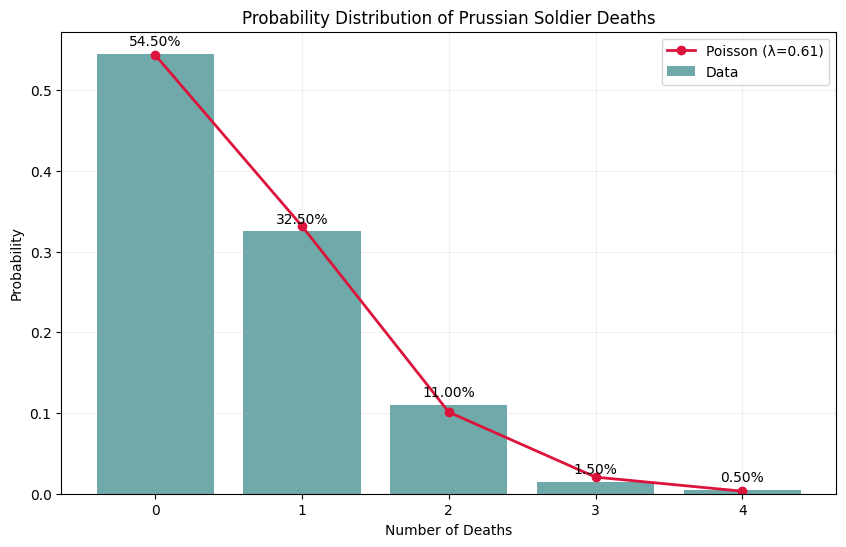

In [26]:
# Given data
deaths = np.array([0, 1, 2, 3, 4])
groups = np.array([109, 65, 22, 3, 1])
total_groups = np.sum(groups)

# Calculate the probability distribution from the data
prob_distribution = groups / total_groups

# The estimated lambda (average number of deaths)
lambda_estimate = np.sum(deaths * prob_distribution)

# Define a function to calculate the Poisson probability mass function
def poisson_pmf(k, lambda_val):
    return np.exp(-lambda_val) * (lambda_val**k) / math.factorial(k)

# Calculate the Poisson distribution using list comprehension
poisson_values = [poisson_pmf(k, lambda_estimate) for k in deaths]

# Create a bar plot of the data and overlay the Poisson distribution
plt.figure(figsize=(10, 6)) 
sns.barplot(x=deaths, y=prob_distribution, color='teal', label='Data',alpha=0.6)
plt.plot(deaths, poisson_values, label=f'Poisson (λ={lambda_estimate:.2f})', linewidth=2,color='crimson', marker='o')

# Add labels and title to the plot
plt.xlabel('Number of Deaths')
plt.ylabel('Probability')
plt.title('Probability Distribution of Prussian Soldier Deaths')

# Add percentages on top of the bar graph
for i, prob in enumerate(prob_distribution):
    plt.text(deaths[i], prob + 0.01, f'{prob * 100:.2f}%', ha='center')

# Add legend to the plot
plt.grid(alpha=0.2)
plt.legend()
plt.show()


The observed data closely matches the Poisson prediction, it suggests that the Poisson distribution is a good model for this scenario. 